In [64]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt,seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [65]:
pd.__version__

'1.5.0'

# 1) LOAD THE DATA

In [66]:
data=pd.read_excel("Online Retail.xlsx")

# 2.UNDERSTAND THE DATA

In [67]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
data.shape

(541909, 8)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [70]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3) clean the data

In [71]:
(data.isnull().sum()/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Handling the missing values in Description column

In [72]:
data["Description"].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [73]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [74]:
data["Description"].fillna(data["Description"].mode()[0],inplace=True)

In [75]:
(data.isnull().sum()/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [76]:
(data.isnull().sum()/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [77]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

For dropping the customerID ROWS

In [78]:
data.dropna(inplace=True)

In [79]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [80]:
data.shape

(406829, 8)

In [81]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [82]:
data["Amount"]=round(data["UnitPrice"]*data["Quantity"],2)

In [83]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


# 4) Feature Engineering

In [85]:
monetarydata=data.groupby("CustomerID")["Amount"].sum().reset_index()

In [86]:
data.shape

(406829, 9)

In [87]:
monetarydata["Total Money"]=monetarydata["Amount"]

In [88]:
monetarydata=monetarydata.drop("Amount",axis=1)

In [89]:
monetarydata.head()

,CustomerID,Total Money
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [90]:
frequencydata=data.groupby("CustomerID")["InvoiceNo"].count().reset_index()

In [91]:
frequencydata["Transactions"]=frequencydata["InvoiceNo"]

In [92]:
frequencydata.drop("InvoiceNo",axis=1,inplace=True)

In [93]:
frequencydata.head()

,CustomerID,Transactions
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [94]:
frequencydata.min()

CustomerID      12346.0
Transactions        1.0
dtype: float64

In [95]:
monetary_freqdata=monetarydata.merge(frequencydata,how="inner",on="CustomerID")

In [96]:
monetary_freqdata.shape

(4372, 3)

In [97]:
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [98]:
data["recency"]=data["InvoiceDate"].max()-data["InvoiceDate"]

In [99]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [100]:
data["recency"]=data["recency"].dt.days

In [101]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [102]:
recency=data.groupby("CustomerID")["recency"].min()

In [103]:
recency

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: recency, Length: 4372, dtype: int64

In [104]:
new_data=monetary_freqdata.merge(recency,how="inner",on="CustomerID")

# Creating new features

In [105]:
new_data.head()

,CustomerID,Total Money,Transactions,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Identifying outliers

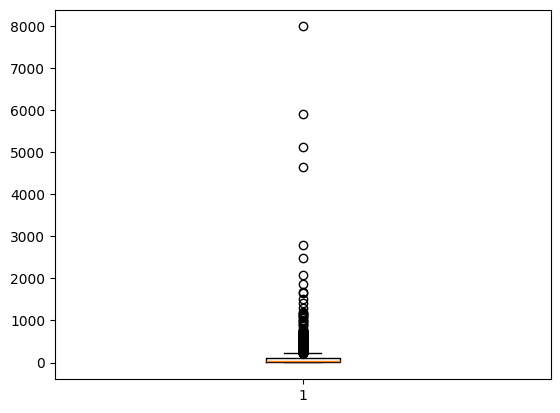

In [106]:
plt.boxplot(new_data["Transactions"])
plt.show()

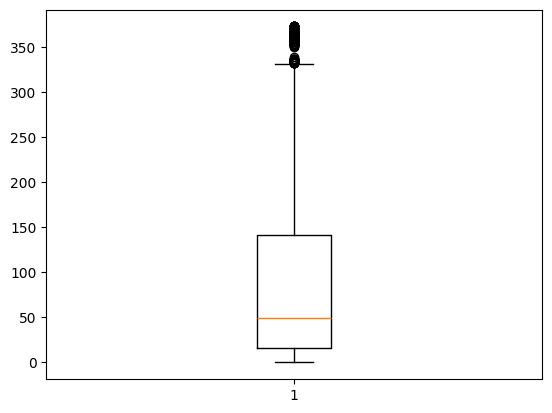

In [107]:
plt.boxplot(new_data["recency"])
plt.show()

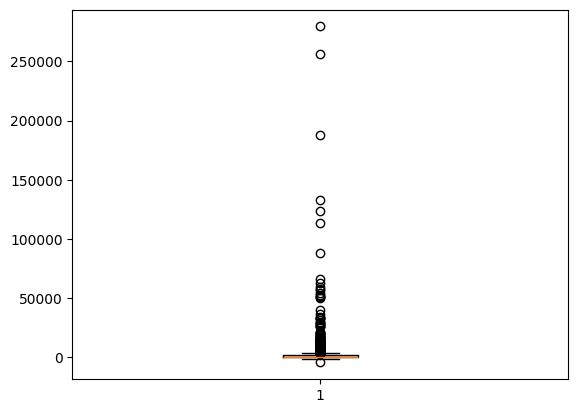

In [108]:
plt.boxplot(new_data["Total Money"])
plt.show()

# performing Normalization to  treat the outliers

In [109]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    4372 non-null   float64
 1   Total Money   4372 non-null   float64
 2   Transactions  4372 non-null   int64  
 3   recency       4372 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 170.8 KB


In [110]:
new_data["Total Money"]=new_data["Total Money"].astype(int)

In [111]:
new_data["Transactions"]=new_data["Transactions"].astype(int)

In [112]:
scaler=MinMaxScaler()
new_data[["Total Money","Transactions","recency"]]=scaler.fit_transform(new_data[["Total Money","Transactions","recency"]])

In [113]:
new_data.head()

,CustomerID,Total Money,Transactions,recency
0,12346.0,0.015107,0.000125,0.871314
1,12347.0,0.030295,0.022676,0.002681
2,12348.0,0.021439,0.003758,0.198391
3,12349.0,0.021298,0.009020,0.048257
4,12350.0,0.016284,0.002005,0.828418


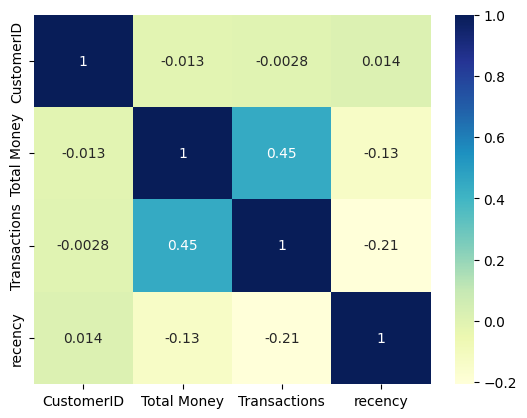

In [116]:
sns.heatmap(new_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

C:\Users\dhara\AppData\Local\Temp\ipykernel_11040\55506705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")


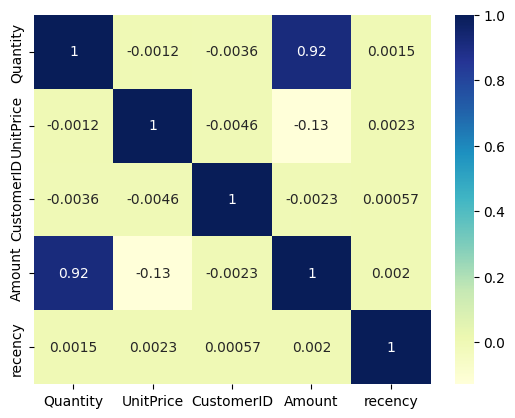

In [118]:
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()